In [2]:
library(glmnet)
library(caret)
library(pROC)
library(randomForest)
library(ROSE)

Loading required package: Matrix
Loaded glmnet 3.0

Loading required package: lattice
Loading required package: ggplot2
Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin

Loaded ROSE 0.0-3



In [3]:
#REMOVE ALL THE OBJECTS STORED IN CURRENT WORKING R ENVIRONMENT ( cleans the RAM )
rm(list=ls())

In [4]:
#Set the Directory 
setwd("F:/Data Science/Projects/Santander Customer Transaction/R Program");

In [5]:
#Verify if Directory  is set or not
getwd()

[1] "F:/Data Science/Projects/Santander Customer Transaction/R Program"

# Reading file

In [6]:
#Read the file 
Train<-read.csv('train.csv')
Test<-read.csv('test.csv')

# Lets have a look at the data

In [46]:
head(Train)
head(Test)

ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602


ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846
test_5,5.9862,-2.2913,8.6058,7.0685,14.2465,-8.6761,4.2467,14.7632,1.8790,...,-2.1115,7.1178,-0.4249,8.8781,14.9438,-2.2151,-6.0233,9.8117,17.1127,10.8240


In [47]:
#Now lets have a look at mean meadina and mode and other imp measures of our dataset
summary(Train)
summary(Test)

        ID_code           target           var_0             var_1        
 train_0    :     1   Min.   :0.0000   Min.   : 0.4084   Min.   :-15.043  
 train_1    :     1   1st Qu.:0.0000   1st Qu.: 8.4538   1st Qu.: -4.740  
 train_10   :     1   Median :0.0000   Median :10.5247   Median : -1.608  
 train_100  :     1   Mean   :0.1005   Mean   :10.6799   Mean   : -1.628  
 train_1000 :     1   3rd Qu.:0.0000   3rd Qu.:12.7582   3rd Qu.:  1.359  
 train_10000:     1   Max.   :1.0000   Max.   :20.3150   Max.   : 10.377  
 (Other)    :199994                                                       
     var_2            var_3             var_4            var_5         
 Min.   : 2.117   Min.   :-0.0402   Min.   : 5.075   Min.   :-32.5626  
 1st Qu.: 8.722   1st Qu.: 5.2541   1st Qu.: 9.883   1st Qu.:-11.2004  
 Median :10.580   Median : 6.8250   Median :11.108   Median : -4.8331  
 Mean   :10.715   Mean   : 6.7965   Mean   :11.078   Mean   : -5.0653  
 3rd Qu.:12.517   3rd Qu.: 8.3241   3rd 

       ID_code           var_0             var_1             var_2       
 test_0    :     1   Min.   : 0.1887   Min.   :-15.043   Min.   : 2.355  
 test_1    :     1   1st Qu.: 8.4430   1st Qu.: -4.700   1st Qu.: 8.736  
 test_10   :     1   Median :10.5138   Median : -1.591   Median :10.561  
 test_100  :     1   Mean   :10.6587   Mean   : -1.624   Mean   :10.707  
 test_1000 :     1   3rd Qu.:12.7396   3rd Qu.:  1.343   3rd Qu.:12.495  
 test_10000:     1   Max.   :22.3234   Max.   :  9.385   Max.   :18.714  
 (Other)   :199994                                                       
     var_3             var_4            var_5              var_6      
 Min.   :-0.0224   Min.   : 5.484   Min.   :-27.7670   Min.   :2.216  
 1st Qu.: 5.2305   1st Qu.: 9.891   1st Qu.:-11.2014   1st Qu.:4.773  
 Median : 6.8224   Median :11.100   Median : -4.8341   Median :5.392  
 Mean   : 6.7882   Mean   :11.076   Mean   : -5.0506   Mean   :5.415  
 3rd Qu.: 8.3276   3rd Qu.:12.253   3rd Qu.:  0.9426 

From above we understood that : 
    1. The Train and Test data are having relatively large standard deviation which means the values are deviating        more from their mean.
    2. The  parameters mean, std, min, 25%, 50%, 75%  and max of Train and Test data looks close to each other.
    3. Mean values are distributed over a large range.

In [48]:
#Dimensions
dim(Train)
dim(Test)

[1] 200000    202

[1] 200000    201

In [49]:
#Now  lets find out if our Target variables is balanced or not
table(Train$target)


     0      1 
179902  20098 

The  above counts clearly indicated that 0's values  are a lot more than the 1's which means target is unbalanced

## Checking for missing Values

In [50]:
#Train data
if (sum(sapply(Train, function(x) sum(is.null(x)))) == 0 ){
  print("We are not having  any missing values in our Train dataset") 
} else {
    print("We are having  any missing values in our Train dataset") 
}

#Test data
if (sum(sapply(Test, function(x) sum(is.null(x)))) == 0 ){
  print("We are not having  any missing values in our Test dataset") 
} else {
    print("We are  having  any missing values in our Test dataset") 
}

[1] "We are not having  any missing values in our Train dataset"
[1] "We are not having  any missing values in our Test dataset"


# Data Distribution - Train Data

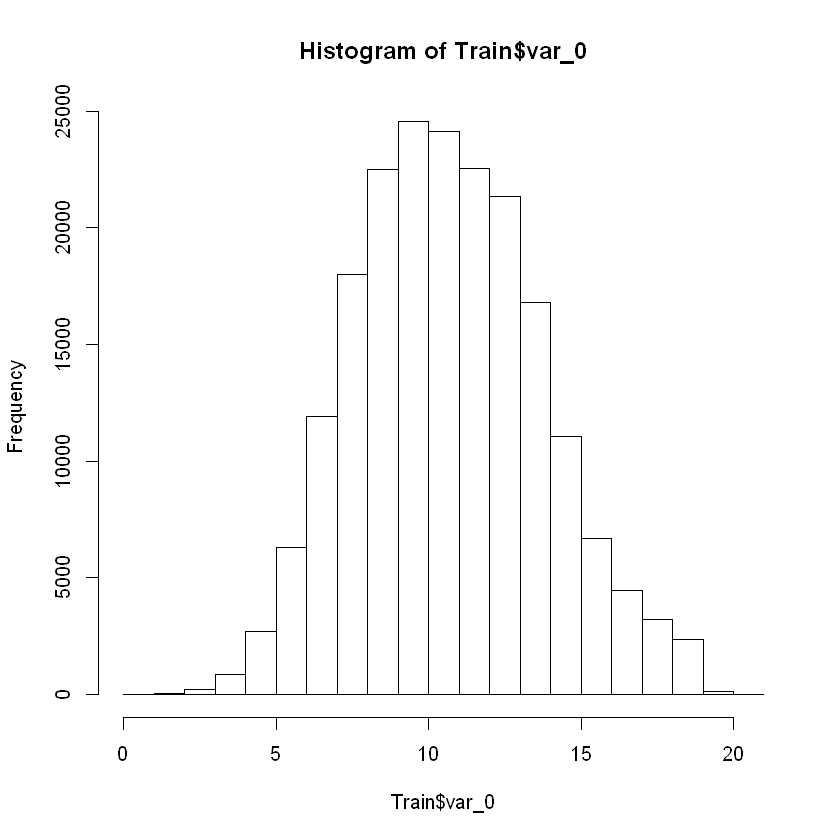

In [51]:
# Data Distribution
hist(Train$var_0)

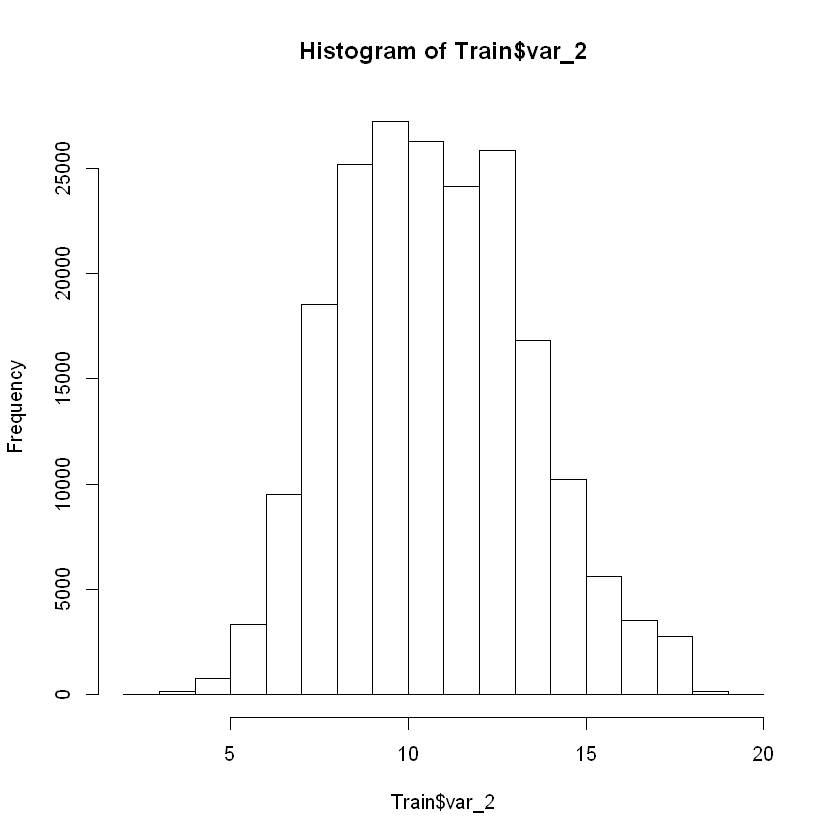

In [52]:
hist(Train$var_2)

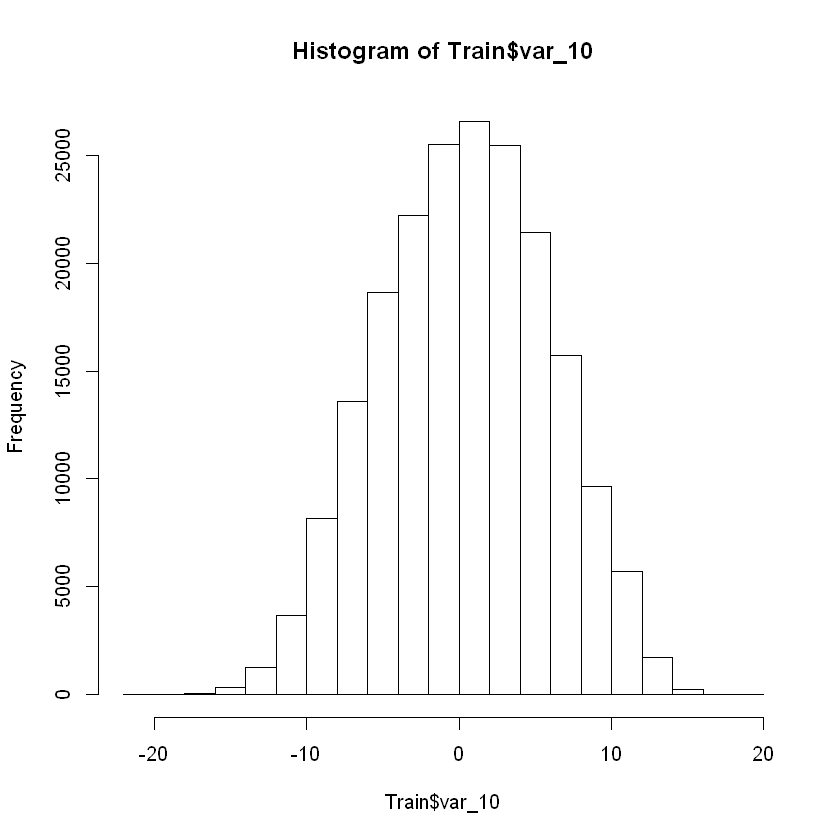

In [53]:
hist(Train$var_10)

# Data Distribution - Test Data

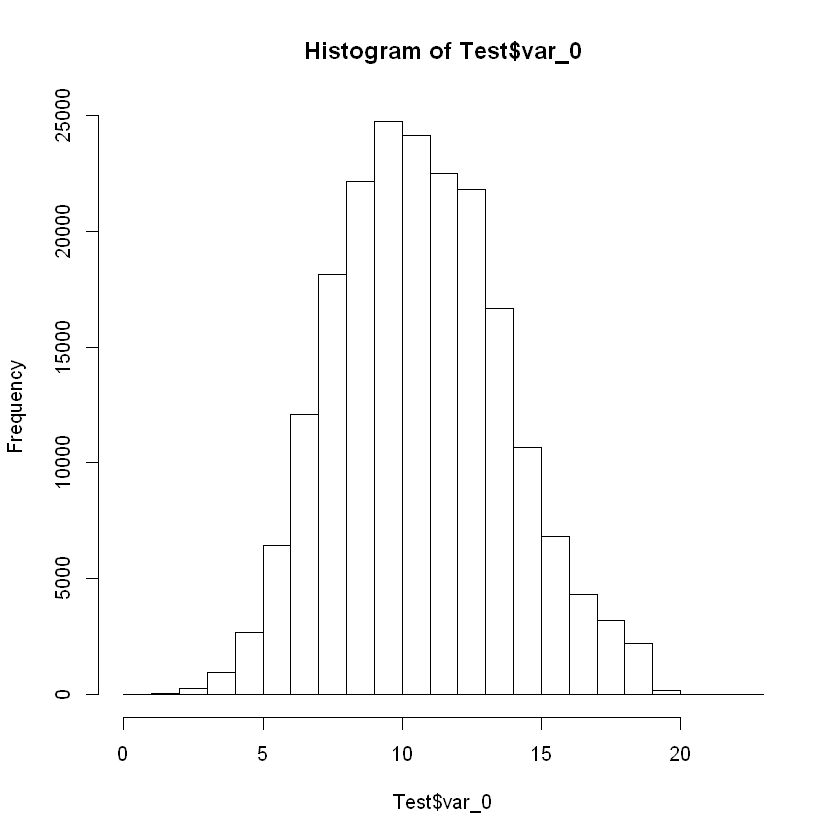

In [54]:
hist(Test$var_0)

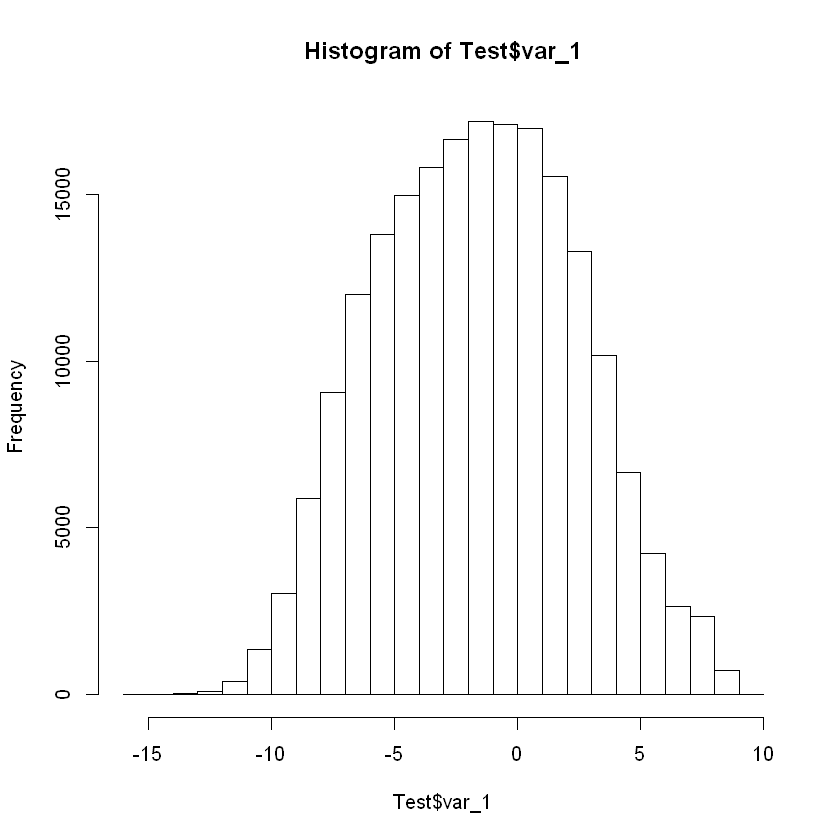

In [55]:
hist(Test$var_1)

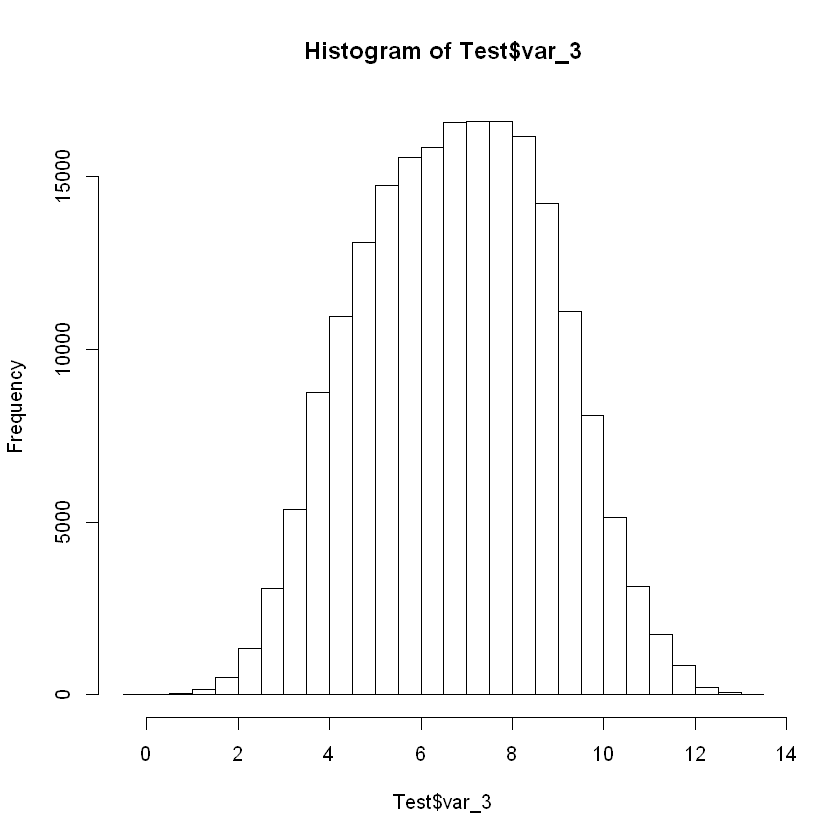

In [56]:
hist(Test$var_3)

So from above histogram plot what  we got is that our data is uniformely distributed . so 
we will do standerdisation of our dataset.

In [7]:
#Standerdization of Train Data
cnames = colnames(Train[3:202])

for (i in cnames){
  Train[,i] = ( Train[,i] - mean(Train[,i]) ) / sd(Train[,i]) 
}

In [8]:
#Standerdization of Train Data
cnames = colnames(Test[2:201])

for (i in cnames){
  Test[,i] = ( Test[,i] - mean(Test[,i]) ) / sd(Test[,i]) 
}

In [9]:
head(Train)
head(Test)

ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
train_0,0,-0.5771003,-1.27373383,0.4517062,-0.83370690,0.23557088,-0.5364288,-0.3349253,0.608749006,...,0.26337299,-1.14915514,0.8174667,-0.4110123,0.1687045,-1.5781133,1.0221282,-0.3739672,-1.0263953,0.2141343
train_1,0,0.2699579,-0.62213600,1.1903575,-0.68884454,0.79097257,1.5398966,0.2444606,-0.003525343,...,0.96660876,0.09360444,0.4436224,1.9087596,-0.8175923,1.5223384,1.0676514,-0.1293993,0.8254151,0.5056840
train_2,0,-0.6811117,-0.27606571,0.5169871,0.53651478,-0.30547601,-0.5110322,1.7698344,-0.564747574,...,-0.07209329,0.77799544,-0.1741305,-0.4123149,1.1515883,2.2973639,-1.6179021,-0.6951389,-0.3814484,0.3566805
train_3,0,0.1251577,-0.12942533,-0.6675738,0.19535415,0.92799014,0.4106712,0.5006320,-0.474199547,...,0.27021522,-0.89145420,-0.8184658,-0.4785469,1.6078645,-0.7895155,-0.9590174,1.5017405,0.6971165,-0.5435002
train_4,0,-0.2773027,0.03560991,0.8176807,-0.07782884,0.73860525,0.9555720,0.6133705,0.791541921,...,-1.03618880,0.68898591,-1.4059837,1.4685325,-1.5010976,-0.9584707,0.2976265,0.6455359,0.7063163,-0.5253741
train_5,0,0.2619646,-0.17051130,0.7167300,0.89553850,-0.07160969,1.0970272,-1.0117024,-0.386284580,...,-2.09241308,-0.27649130,2.2749658,-0.7243115,-0.9723849,0.8209816,-1.0867316,0.9318778,-1.0926203,-0.1373502


ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
test_0,0.1339812,2.32744029,0.8527878,1.2865765,0.2204210,0.3393008,0.5020734,0.5076264,0.5569626,...,-1.1744859,1.4515556,-2.26758192,-0.21804384,-1.3646104,1.8189806,0.3808979,1.9628227,-0.1319445,-0.52635584
test_1,-0.7008681,0.71242105,0.2267552,-0.7806282,-1.1624188,0.1320141,0.6990235,0.6139490,-1.4070529,...,1.6318048,0.4550560,-0.66599107,1.70342039,-0.7706892,0.4273388,-0.6933271,1.0413371,1.0835570,-1.70500615
test_2,-1.7044853,-2.16157318,-0.2151769,0.1265081,-0.5033227,1.8878135,-0.6015641,1.0876265,0.3738449,...,-0.8652954,1.1685981,0.03672777,-0.28581841,-1.5970143,1.5820042,-1.7258359,-2.0095770,1.3382502,-1.91690029
test_3,-0.6985630,0.07475389,0.4990902,-0.1039175,-1.3799317,1.0451965,-0.5498690,1.1788228,0.9294980,...,1.4019113,0.5349518,-0.18104750,0.06489248,-0.8945807,2.3076920,0.3058567,0.3443049,-0.9480398,-0.09274893
test_4,0.3448011,0.36914748,1.2992380,0.4688337,-1.2205089,-0.4491181,1.6703586,-1.7299968,0.8135494,...,0.2276597,0.5665862,-0.43409386,0.01396144,0.4958311,-0.1065576,-1.3682751,-1.7637317,-0.6458512,-0.57106383
test_5,-1.5386812,-0.16509212,-0.7979275,0.1365435,1.9611424,-0.4607202,-1.3513159,-0.5156817,0.4805536,...,-1.1647963,-0.1125448,-1.58844470,1.39055113,-0.9721442,-1.4558822,-1.5265647,0.9765096,0.4133045,1.35310109


## Correlations - between the features

In [15]:
cor(Train[,3:50])

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47
var_0,1.000000e+00,-5.436992e-04,0.0065728338,3.800761e-03,1.325809e-03,3.046247e-03,6.982549e-03,2.429014e-03,4.962431e-03,-0.0026126502,...,-0.0004699504,-1.408900e-03,6.798366e-03,1.152494e-03,-4.404026e-04,2.685343e-03,-3.003208e-03,-0.0015388620,1.286995e-04,4.061957e-03
var_1,-5.436992e-04,1.000000e+00,0.0039804942,1.022949e-05,3.034899e-04,-9.017325e-04,3.257729e-03,1.511181e-03,4.098488e-03,-0.0008323170,...,0.0015445860,-7.542526e-04,1.829743e-03,1.239720e-03,2.491776e-03,-2.298870e-03,-6.389550e-03,-0.0035098564,-2.196600e-03,4.786353e-03
var_2,6.572834e-03,3.980494e-03,1.0000000000,1.000860e-03,7.228454e-04,1.568905e-03,8.825211e-04,-9.906046e-04,2.648399e-03,-0.0019320458,...,-0.0007353427,2.290366e-03,9.725078e-04,8.488615e-04,-4.261838e-03,-4.653642e-03,1.792392e-03,0.0007322377,3.784190e-03,2.952736e-03
var_3,3.800761e-03,1.022949e-05,0.0010008601,1.000000e+00,-3.216973e-04,3.253349e-03,-7.743892e-04,2.499946e-03,3.553395e-03,-0.0008257920,...,-0.0027481811,-2.053555e-03,2.082652e-03,1.853394e-04,-1.274896e-03,4.423252e-04,-1.357565e-03,-0.0004195359,1.711637e-03,4.015895e-04
var_4,1.325809e-03,3.034899e-04,0.0007228454,-3.216973e-04,1.000000e+00,-1.368157e-03,4.882529e-05,4.548886e-03,1.193622e-03,-0.0009183436,...,-0.0003567881,-2.013616e-03,-9.758088e-05,2.332206e-03,-4.394244e-03,9.123478e-04,8.427344e-04,-0.0024002132,-3.089050e-03,1.013133e-03
var_5,3.046247e-03,-9.017325e-04,0.0015689051,3.253349e-03,-1.368157e-03,1.000000e+00,2.587780e-03,-9.949490e-04,1.469427e-04,-0.0052793071,...,0.0021629728,9.910693e-06,4.506838e-03,4.767785e-03,2.004954e-03,7.398571e-04,6.538976e-04,0.0006937240,5.617243e-03,1.318045e-03
var_6,6.982549e-03,3.257729e-03,0.0008825211,-7.743892e-04,4.882529e-05,2.587780e-03,1.000000e+00,-2.547746e-03,-1.187995e-03,-0.0056969194,...,-0.0035732412,7.528261e-04,9.118882e-04,-6.854473e-04,2.538593e-03,-3.732548e-03,-6.018185e-03,-0.0025021393,-2.829392e-04,1.573970e-03
var_7,2.429014e-03,1.511181e-03,-0.0009906046,2.499946e-03,4.548886e-03,-9.949490e-04,-2.547746e-03,1.000000e+00,8.143795e-04,0.0028853742,...,0.0024345299,6.532764e-04,-5.582447e-04,-1.610854e-04,2.356258e-03,-1.000094e-03,-5.395936e-03,-0.0033659275,1.290182e-03,3.718453e-05
var_8,4.962431e-03,4.098488e-03,0.0026483989,3.553395e-03,1.193622e-03,1.469427e-04,-1.187995e-03,8.143795e-04,1.000000e+00,-0.0010734893,...,0.0015553284,-5.524959e-04,-4.371297e-03,1.307023e-04,-2.789755e-03,-2.443920e-03,1.775569e-03,0.0002292724,1.128676e-03,1.440420e-03
var_9,-2.612650e-03,-8.323170e-04,-0.0019320458,-8.257920e-04,-9.183436e-04,-5.279307e-03,-5.696919e-03,2.885374e-03,-1.073489e-03,1.0000000000,...,0.0018354863,-6.373267e-04,-1.303449e-03,1.361167e-03,4.911862e-04,3.230421e-03,1.529653e-03,0.0004316046,-3.892974e-03,5.096184e-03


In [16]:
cor(Train[,51:100])

,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,...,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97
var_48,1.0000000000,-0.0015963981,-3.022906e-03,0.0037446422,3.328963e-03,-6.704178e-04,-1.080399e-03,-9.728962e-04,-3.222577e-03,2.606660e-03,...,-7.007591e-04,3.302217e-03,8.231287e-04,3.460428e-03,-3.571292e-03,0.0003026509,4.423138e-03,0.0013187409,0.0024687022,1.797097e-03
var_49,-0.0015963981,1.0000000000,2.763169e-03,0.0013054339,6.016378e-04,4.215742e-03,-7.067403e-04,1.601735e-03,-1.183995e-04,2.454395e-03,...,-2.044536e-03,8.355060e-04,2.204536e-03,-1.476941e-03,5.635865e-03,0.0027338863,7.654063e-04,0.0014307308,0.0029218568,4.854259e-03
var_50,-0.0030229058,0.0027631687,1.000000e+00,-0.0006778562,4.201644e-04,2.120425e-03,-2.833327e-03,3.852664e-04,5.524241e-03,-4.783269e-04,...,2.010498e-03,-1.452555e-03,5.309966e-04,-2.933506e-03,6.079200e-03,0.0045768890,1.236791e-04,0.0015703424,-0.0026584155,6.173793e-04
var_51,0.0037446422,0.0013054339,-6.778562e-04,1.0000000000,3.076651e-03,5.107246e-03,1.269697e-03,2.479046e-03,4.198010e-03,-2.413030e-03,...,-7.479498e-04,-7.178174e-04,-7.923246e-04,1.394543e-03,-4.746483e-03,-0.0016446956,3.433755e-03,-0.0015253353,0.0036294337,-1.124448e-03
var_52,0.0033289625,0.0006016378,4.201644e-04,0.0030766508,1.000000e+00,2.566472e-03,-1.686636e-04,9.402507e-04,2.406988e-03,2.547645e-03,...,2.862240e-03,1.739634e-03,3.069559e-03,1.933621e-03,-1.428385e-03,-0.0021724399,3.398585e-03,0.0018979215,0.0015600178,-8.985823e-04
var_53,-0.0006704178,0.0042157419,2.120425e-03,0.0051072462,2.566472e-03,1.000000e+00,9.726755e-05,2.387079e-03,-1.262986e-03,1.035694e-03,...,-3.855794e-03,2.500298e-03,4.521416e-03,1.957307e-03,-1.047664e-03,-0.0019371584,1.873639e-03,0.0045704064,0.0025292605,-5.649601e-04
var_54,-0.0010803992,-0.0007067403,-2.833327e-03,0.0012696970,-1.686636e-04,9.726755e-05,1.000000e+00,-6.966960e-04,5.675438e-04,4.702444e-03,...,1.285429e-04,8.476196e-04,-1.735916e-03,2.194838e-03,-3.458460e-04,0.0001743208,1.760085e-03,-0.0005533757,-0.0006094308,-1.770626e-03
var_55,-0.0009728962,0.0016017347,3.852664e-04,0.0024790456,9.402507e-04,2.387079e-03,-6.966960e-04,1.000000e+00,-1.612177e-03,-5.600167e-03,...,4.588632e-03,1.989908e-03,8.971596e-04,-1.373813e-03,2.994774e-03,0.0009389645,1.353824e-03,-0.0009110773,-0.0002749128,8.542153e-04
var_56,-0.0032225765,-0.0001183995,5.524241e-03,0.0041980100,2.406988e-03,-1.262986e-03,5.675438e-04,-1.612177e-03,1.000000e+00,-3.211467e-04,...,1.453454e-03,-1.751602e-04,-3.377312e-04,3.388439e-03,1.791788e-04,0.0016312497,-4.465902e-03,0.0009751065,-0.0018576310,8.399743e-06
var_57,0.0026066602,0.0024543952,-4.783269e-04,-0.0024130296,2.547645e-03,1.035694e-03,4.702444e-03,-5.600167e-03,-3.211467e-04,1.000000e+00,...,-1.760662e-03,-3.428941e-03,1.656022e-03,-2.909878e-03,3.296697e-03,0.0027062214,1.159504e-05,0.0031841330,0.0032255622,4.056305e-03


In [17]:
cor(Train[,101:150])

,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,...,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147
var_98,1.0000000000,-0.0054463585,-1.549760e-03,0.0005144388,0.0031334079,0.0016126333,-2.172801e-04,-9.363096e-04,-7.711990e-04,-4.911828e-04,...,-2.184623e-04,-1.921945e-03,-1.048495e-03,-5.318303e-04,0.0040075125,1.195612e-03,-1.487187e-03,-0.0007063481,3.636497e-04,-3.091329e-03
var_99,-0.0054463585,1.0000000000,1.802806e-03,0.0019429925,-0.0026984284,-0.0009092136,1.473162e-03,3.997466e-03,4.772787e-03,-1.355737e-03,...,-1.598888e-03,-3.943266e-03,4.741254e-03,-2.123612e-03,0.0026283484,4.898578e-04,1.786719e-03,0.0015250357,-2.221539e-03,3.468623e-03
var_100,-0.0015497602,0.0018028060,1.000000e+00,0.0029373164,0.0029179078,-0.0013263167,-3.921585e-03,-9.630867e-04,-2.868063e-04,1.552327e-03,...,3.995582e-05,1.084616e-03,1.972192e-03,1.397656e-03,-0.0023041304,-3.417024e-03,1.584978e-03,0.0030780333,3.404551e-04,-5.683518e-04
var_101,0.0005144388,0.0019429925,2.937316e-03,1.0000000000,-0.0004811994,-0.0069904132,4.260142e-04,1.868403e-03,4.370308e-03,-7.892100e-04,...,-2.323194e-03,5.750232e-04,-6.432991e-04,-2.623964e-04,0.0011157019,-2.008558e-03,-3.428681e-03,0.0019359467,3.635321e-04,-1.324352e-03
var_102,0.0031334079,-0.0026984284,2.917908e-03,-0.0004811994,1.0000000000,-0.0002152323,-1.499461e-03,-1.780673e-03,1.958312e-03,-7.447816e-04,...,3.046847e-03,3.846624e-03,1.094236e-03,-2.693583e-04,-0.0010875008,9.970876e-04,-2.589423e-03,0.0029807172,-9.568030e-04,-2.618007e-03
var_103,0.0016126333,-0.0009092136,-1.326317e-03,-0.0069904132,-0.0002152323,1.0000000000,-1.533144e-03,3.478059e-03,9.885337e-04,1.432460e-03,...,2.432059e-03,-2.567631e-04,-2.126842e-04,-2.403206e-03,0.0029464818,-2.610741e-03,8.609296e-04,-0.0032251344,9.561020e-04,-2.005025e-04
var_104,-0.0002172801,0.0014731617,-3.921585e-03,0.0004260142,-0.0014994606,-0.0015331438,1.000000e+00,6.213480e-04,-3.749566e-03,2.377673e-04,...,-2.990601e-03,1.776223e-03,3.042155e-03,-1.309232e-03,-0.0020993054,4.866117e-03,2.822967e-03,-0.0012998786,1.180223e-03,-1.550817e-03
var_105,-0.0009363096,0.0039974664,-9.630867e-04,0.0018684031,-0.0017806734,0.0034780585,6.213480e-04,1.000000e+00,1.266677e-03,-1.842013e-05,...,4.001537e-03,-5.575076e-03,-1.033370e-03,2.917071e-04,0.0032115595,2.100392e-03,1.365026e-03,0.0013338222,8.776714e-04,1.234156e-03
var_106,-0.0007711990,0.0047727865,-2.868063e-04,0.0043703083,0.0019583118,0.0009885337,-3.749566e-03,1.266677e-03,1.000000e+00,-3.595752e-03,...,1.703963e-04,-2.829808e-03,2.247738e-03,1.177200e-04,-0.0030005793,-7.946333e-04,1.319223e-03,0.0030519322,-5.997798e-04,-3.086940e-03
var_107,-0.0004911828,-0.0013557367,1.552327e-03,-0.0007892100,-0.0007447816,0.0014324600,2.377673e-04,-1.842013e-05,-3.595752e-03,1.000000e+00,...,1.350321e-03,3.038429e-03,-7.845240e-04,1.540052e-03,-0.0013103603,-2.869656e-03,-6.585006e-04,-0.0023041623,5.487754e-03,-1.449966e-03


## Correlation - of features with target variable

In [18]:
cor(Train[,2:202])

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,1.0000000000,5.238959e-02,5.034263e-02,0.0558703478,1.105522e-02,1.091464e-02,3.097863e-02,6.673085e-02,-0.0030248096,1.958427e-02,...,5.597341e-02,4.711368e-02,-4.285840e-02,-1.770937e-02,-2.283766e-02,2.828454e-02,2.360780e-02,-3.530274e-02,-0.0529996414,2.543448e-02
var_0,0.0523895918,1.000000e+00,-5.436992e-04,0.0065728338,3.800761e-03,1.325809e-03,3.046247e-03,6.982549e-03,0.0024290136,4.962431e-03,...,2.752206e-03,2.058475e-04,-5.372594e-03,1.616389e-03,-1.513828e-03,2.072891e-03,4.385592e-03,-7.527427e-04,-0.0057756970,3.849928e-03
var_1,0.0503426288,-5.436992e-04,1.000000e+00,0.0039804942,1.022949e-05,3.034899e-04,-9.017325e-04,3.257729e-03,0.0015111807,4.098488e-03,...,6.627445e-03,3.620972e-03,-2.603830e-03,1.153440e-03,-2.557459e-03,-7.852730e-04,-3.770025e-04,-4.156961e-03,-0.0048609560,2.287120e-03
var_2,0.0558703478,6.572834e-03,3.980494e-03,1.0000000000,1.000860e-03,7.228454e-04,1.568905e-03,8.825211e-04,-0.0009906046,2.648399e-03,...,1.965815e-04,1.284570e-03,-3.399595e-03,5.490486e-04,2.104071e-03,-1.069707e-03,3.951844e-03,1.078188e-03,-0.0008770672,3.854832e-03
var_3,0.0110552237,3.800761e-03,1.022949e-05,0.0010008601,1.000000e+00,-3.216973e-04,3.253349e-03,-7.743892e-04,0.0024999460,3.553395e-03,...,1.508267e-04,2.445381e-03,-1.529992e-03,-1.698896e-03,-1.053725e-03,1.206004e-03,-2.799964e-03,1.163899e-03,-0.0016509079,5.055321e-04
var_4,0.0109146385,1.325809e-03,3.034899e-04,0.0007228454,-3.216973e-04,1.000000e+00,-1.368157e-03,4.882529e-05,0.0045488857,1.193622e-03,...,1.513793e-03,4.356636e-03,3.347023e-03,8.134391e-04,-6.801224e-05,3.706012e-03,5.130522e-04,-4.602317e-05,-0.0018206709,-7.860876e-04
var_5,0.0309786274,3.046247e-03,-9.017325e-04,0.0015689051,3.253349e-03,-1.368157e-03,1.000000e+00,2.587780e-03,-0.0009949490,1.469427e-04,...,1.465541e-03,-2.225330e-05,1.115520e-03,-2.237489e-03,-2.542891e-03,-1.273660e-03,2.879974e-03,-5.347813e-04,-0.0009532011,2.767143e-03
var_6,0.0667308456,6.982549e-03,3.257729e-03,0.0008825211,-7.743892e-04,4.882529e-05,2.587780e-03,1.000000e+00,-0.0025477455,-1.187995e-03,...,7.213321e-04,5.604217e-03,-2.562816e-03,2.463706e-03,-1.140816e-03,1.243768e-03,5.378485e-03,-3.565184e-03,-0.0030246739,6.096300e-03
var_7,-0.0030248096,2.429014e-03,1.511181e-03,-0.0009906046,2.499946e-03,4.548886e-03,-9.949490e-04,-2.547746e-03,1.0000000000,8.143795e-04,...,-3.371778e-04,-3.956720e-03,1.732927e-03,3.218592e-03,-2.699386e-04,1.853817e-03,1.045220e-03,3.466034e-03,0.0006500617,-1.456753e-03
var_8,0.0195842709,4.962431e-03,4.098488e-03,0.0026483989,3.553395e-03,1.193622e-03,1.469427e-04,-1.187995e-03,0.0008143795,1.000000e+00,...,2.922788e-03,-1.151228e-03,-4.286941e-04,1.413581e-03,1.312999e-03,1.395911e-03,-3.241934e-03,-4.582679e-03,0.0029499735,8.536717e-04


Conclusion : 
    1. If we see the correlation the features, There is negligible correlation between them
    2. Also the correlation of target variable with the feature is very small

# Train - Test split

In [19]:
set.seed(42)

train.index<-sample(1:nrow(Train),0.8*nrow(Train))
#train data
train.data<-Train[train.index,]
#validation data
valid.data<-Train[-train.index,]
#dimension of train data
dim(train.data)
#dimension of validation data
dim(valid.data)
#target classes in train data
table(train.data$target)
#target classes in validation data
table(valid.data$target)

[1] 160000    202

[1] 40000   202


     0      1 
143830  16170 


    0     1 
36072  3928 

# Logistic Regression

In [20]:
#Train model
lr_model = glm(target~., data = train.data[,-c(1)], family = "binomial")

In [21]:
#Predict from the model
lr_predict = predict(lr_model, newdata = valid.data[,-c(1)], type = "response")

In [22]:
lr_predict <- ifelse(lr_predict > 0.5,1,0)

## Evaluation matrices - Confusion metrix

In [23]:
target<-as.factor(valid.data$target)
lr_predict<-as.factor(lr_predict)
confusionMatrix(data=lr_predict,reference=target)

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 35600  2851
         1   472  1077
                                          
               Accuracy : 0.9169          
                 95% CI : (0.9142, 0.9196)
    No Information Rate : 0.9018          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.3576          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9869          
            Specificity : 0.2742          
         Pos Pred Value : 0.9259          
         Neg Pred Value : 0.6953          
             Prevalence : 0.9018          
         Detection Rate : 0.8900          
   Detection Prevalence : 0.9613          
      Balanced Accuracy : 0.6306          
                                          
       'Positive' Class : 0               
                  

## Evaluation matrices - auc score

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = target, predictor = lr_predict, auc = TRUE,     plot = TRUE)

Data: lr_predict in 36072 controls (target 0) < 3928 cases (target 1).
Area under the curve: 0.6306

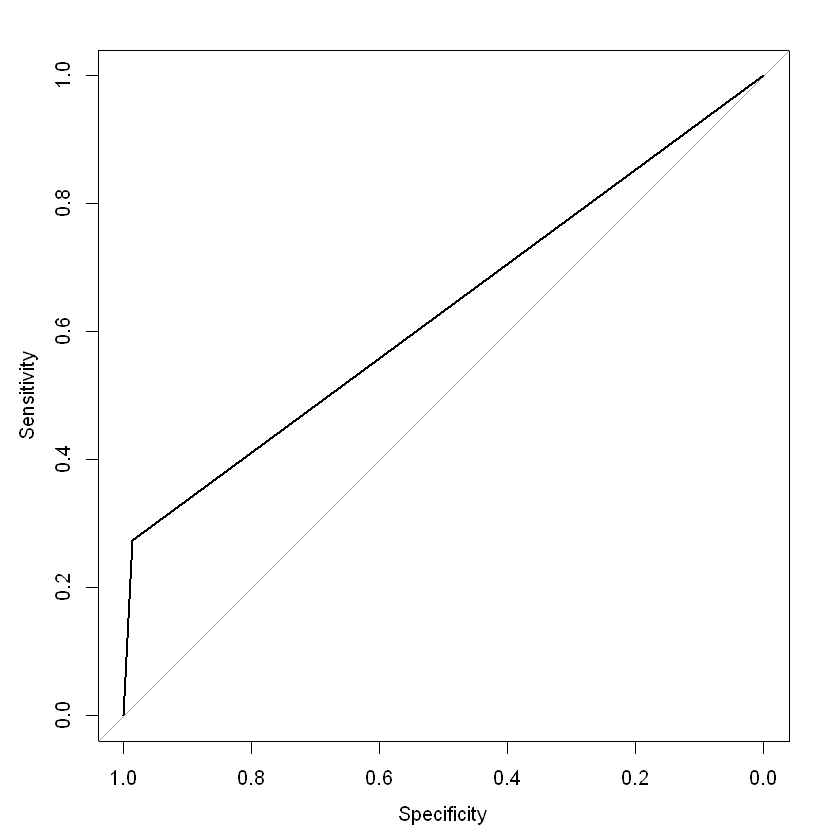

In [24]:
#auc score
lr_predict <-as.numeric(lr_predict)
roc(response=target,predictor= lr_predict,auc=TRUE, plot = TRUE)

In [27]:
#predict the model
memory.limit( size = 8012)
lr_test_pred<-predict(lr_model, Test[,-c(1)])

[1] 8012

In [29]:
lr_test_pred <- ifelse(lr_test_pred > 0.5,1,0)

In [31]:
head(lr_test_pred,100)

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

The roc auc score is not good even though the accuracy is 91%. so since the auc score is not good so the Logistic regression model is not accurate.

# Random Forest

In [ ]:
#Training the Random forest classifier
train.data$target<-as.factor(train.data$target)
rf<-randomForest(target~.,train.data[,-c(1)],ntree=100,importance=TRUE)

In [ ]:
summary(rf)

In [ ]:
rf

In [ ]:
# Predicting on train set
predTrain <- predict(rf, train.data[,-c(1)], type = "class")

In [ ]:
# Checking classification accuracy
table(predTrain, train.data$target)

In [ ]:
# Predicting on Validation set
predValid <- predict(rf, valid.data[,-c(1)], type = "class")

## Evaluation matrices - Confusion metrix

In [ ]:
target<-as.factor(valid.data$target)
predValid<-as.factor(predValid)
confusionMatrix(data=predValid,reference=target)

## Evaluation matrices - auc score

In [ ]:
#auc score
set.seed(42)
target<-as.factor(valid.data$target)
predValid <-as.numeric(predValid)
roc(response=target,predictor= predValid,auc=TRUE, plot = TRUE)

The roc auc score is not good even though the accuracy is 90%. so since the auc score is not good so the Random Forest model is not accurate.

# Random Oversampling Examples(ROSE)

In [30]:
#Random Oversampling Examples(ROSE)
set.seed(42)
train.rose <- ROSE(target~., data =train.data[,-c(1)])$data
#target classes in balanced train data
table(train.rose$target)
valid.rose <- ROSE(target~., data =valid.data[,-c(1)])$data
#target classes in balanced valid data
table(valid.rose$target)


    0     1 
79944 80056 


    0     1 
20021 19979 

In [33]:
#Logistic regression model
lr_rose <-glmnet(as.matrix(train.rose),as.matrix(train.rose$target), family = "binomial")
summary(lr_rose)

           Length Class     Mode     
a0            72  -none-    numeric  
beta       14472  dgCMatrix S4       
df            72  -none-    numeric  
dim            2  -none-    numeric  
lambda        72  -none-    numeric  
dev.ratio     72  -none-    numeric  
nulldev        1  -none-    numeric  
npasses        1  -none-    numeric  
jerr           1  -none-    numeric  
offset         1  -none-    logical  
classnames     2  -none-    character
call           4  -none-    call     
nobs           1  -none-    numeric  

In [ ]:
#Cross validation prediction
#set.seed(473)
cv_rose = cv.glmnet(as.matrix(valid.rose),as.matrix(valid.rose$target),family = "binomial", type.measure = "class")
cv_rose

In [ ]:
#Minimum lambda
cv_rose$lambda.min
#plot the auc score vs log(lambda)
plot(cv_rose)

In [ ]:
#Model performance on validation dataset
#set.seed(442)
cv_predict.rose<-predict(cv_rose,as.matrix(valid.rose),s = "lambda.min", type = "class")
cv_predict.rose

## Evaluation matrices - Confusion metrix

In [ ]:
#Confusion matrix
#set.seed(478)
#actual target variable
target<-valid.rose$target
#convert to factor
target<-as.factor(target)
#predicted target variable
#convert to factor
cv_predict.rose<-as.factor(cv_predict.rose)
#Confusion matrix
confusionMatrix(data=cv_predict.rose,reference=target)

## Evaluation matrices - auc score

In [ ]:
#ROC_AUC score and curve
set.seed(843)
#convert to numeric
cv_predict.rose<-as.numeric(cv_predict.rose)
roc(response=target,predictor=cv_predict.rose,auc=TRUE,plot=TRUE)

In [ ]:
We can observed that ROSE model is performing well on imbalance data compare to baseline logistic regression.